# <span style="color:royalblue"> [3주차] API 쉽게 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 2024 공공데이터 포털 API를 활용한 데이터 습득 및 분석

--- 

<div style="text-align: right"> Final Edition : 2024.1.22<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

### [Remind] API(Application Programming Interface)란? <br>
어플리케이션 소프트웨어를 구축하고 통합하기 위한 정의 및 프로토콜 세트. <span style="color:red">당사자 간의 규약</span><br>
한쪽 당사자가 특정방식으로 <span style="color:red">원격요청(Request)</span>을 보내면  → 다른 당사자가 <span style="color:red">지정된 양식으로 응답(Response)</span>하는 행위<br>

# 1. 공공 데이터 포털 Open API

## 1.1 공공 데이터 포털 API 서비스 신청 :  [공공 데이터 포털](https://www.data.go.kr/) 

* 접속경로 : 국가중점데이터별>부동산거래관리정보>공공데이터보기(파랑버튼)>오픈(API)  
* 접속링크 : [부동산 실거래가 API 목록 페이지](https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=API&keyword=&detailKeyword=&publicDataPk=15056649%2C15056782%2C15057267%2C15057511%2C15058016%2C15058017%2C15058022%2C15058038%2C15058352%2C15058452%2C15058747%2C15059249%2C3050988&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=true&coreDataNm=%EB%B6%80%EB%8F%99%EC%82%B0%EA%B1%B0%EB%9E%98%EA%B4%80%EB%A6%AC%EC%A0%95%EB%B3%B4&sort=&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=)
* 오픈API : 12개(모두 신청, 신청수에 제한이 없음. 연구나 개인공부로 간단히 입력)

![이름](./data/공공데이터포털.jpg)

## 1.2 API KEY 인증키 획득

* 서비스를 신청하면 API KEY는 즉시 부여
* 신청후 해당 서비스를 이용할 수 있는데 까지는 1~2 시간이 걸립니다.
* API KEY는 개인별로 할당된 접속허가 ID/PW의 개념이므로 보안에 유의하시기 바랍니다.

### <span style="color:red"> STUDENT CODE 삭제후 배포(각자의 API KEY를 입력하세요)  </span>

In [86]:
# 각자의 인증키를 입력하세요
serviceKey = ""

## 1.3 데이터 가져오기

서비스 명세서를 간단히 읽어보세요 [국토교통부 실거래가 정보 오픈API 활용 가이드]

http :openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/<span style="color:skyblue">getRTMSDataSvcAptTrade?</span>LAWD_CD=<span style="color:blue">28185</span>&DEAL_YMD=<span style="color:red">20211</span>&serviceKey=<span style="color:lime">인증키번호</span>&
* url의 구성 살펴보기 : API url / 서비스 코드 / 법정구 코드 / 거래년월 / 서비스 키
* <span style="color:skyblue">서비스 코드</span> : getRTMSDataSvcAptTrade? : 국토부 아파트 매매 실거래가 자료
* <span style="color:blue">법정구 코드</span> : "LAWD_CD=" + 법정구코드 + "&"
* <span style="color:red">거래년월</span> : "DEAL_YMD=" + 거래년월 + "&"
* <span style="color:lime">서비스 키</span> : "serviceKey=" + 각자의 API KEY + "&" 

[파이썬 request 사용법 블로그](https://www.daleseo.com/python-requests/)

### 1.3.1 XML(엑스엠엘 ; eXtensible Markup Language)
XML은 W3C에서 개발된, 다른 특수한 목적을 갖는 마크업 언어를 만드는데 사용하도록 권장하는 다목적 마크업 언어

In [15]:
# !pip install requests
import requests
import datetime

url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"

base_date = "202307" ## 거래년월
gu_code = '11740' ## 법정구코드 5자리 (구분. 법정동코드 5자리)

payload = "LAWD_CD=" + gu_code + "&" + \
          "DEAL_YMD=" + base_date + "&" + \
          "serviceKey=" + serviceKey + "&" 
          
res = requests.get(url + payload)
print(res)

<Response [200]>


## 1.4 국토부 실거래가 데이터(xml)를 가져오는 함수정의

In [17]:
# 각 객체에 바인딩 된 값을 출력해보겠습니다.
res.content

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1>     114,000</\xea\xb1\xb0\xeb\x9e\x98\xea\xb8\x88\xec\x95\xa1><\xea\xb1\xb0\xeb\x9e\x98\xec\x9c\xa0\xed\x98\x95>\xec\xa4\x91\xea\xb0\x9c\xea\xb1\xb0\xeb\x9e\x98</\xea\xb1\xb0\xeb\x9e\x98\xec\x9c\xa0\xed\x98\x95><\xea\xb1\xb4\xec\xb6\x95\xeb\x85\x84\xeb\x8f\x84>1985</\xea\xb1\xb4\xec\xb6\x95\xeb\x85\x84\xeb\x8f\x84><\xeb\x85\x84>2023</\xeb\x85\x84><\xeb\x93\xb1\xea\xb8\xb0\xec\x9d\xbc\xec\x9e\x90>23.10.16</\xeb\x93\xb1\xea\xb8\xb0\xec\x9d\xbc\xec\x9e\x90><\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99> \xeb\xaa\x85\xec\x9d\xbc\xeb\x8f\x99</\xeb\xb2\x95\xec\xa0\x95\xeb\x8f\x99><\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8>\xea\xb3\xa0\xeb\x8d\x95\xec\xa3\xbc\xea\xb3\xb59</\xec\x95\x84\xed\x8c\x8c\xed\x8a\xb8><\xec\x9b\x94>7</\xec\x9b\x94><\xec\x9d\xbc>8</\xec\x9d\xbc><\xec\xa0\x84\xec\x9a\x

### DOM(Document Object Model) 문서 객체 모델
XML 문서를 액세스하고 수정하기 위한 W3C(World Wide Web Consortium)의 교차 언어 API  
XML 데이터의 표준 트리 표현  
[DOM 파이썬 공식 문서](https://docs.python.org/ko/3/library/xml.dom.html)
[블로그](https://www.oulub.com/ko-KR/Python/library.xml.dom.minidom)

In [18]:
# 좀더 예쁘게(pretty) 볼까요?

import xml.dom.minidom
dom = xml.dom.minidom.parseString(res.content)

pretty_xml_as_string = dom.toprettyxml()
pretty_xml_as_string

'<?xml version="1.0" ?>\n<response>\n\t<header>\n\t\t<resultCode>00</resultCode>\n\t\t<resultMsg>NORMAL SERVICE.</resultMsg>\n\t</header>\n\t<body>\n\t\t<items>\n\t\t\t<item>\n\t\t\t\t<거래금액>     114,000</거래금액>\n\t\t\t\t<거래유형>중개거래</거래유형>\n\t\t\t\t<건축년도>1985</건축년도>\n\t\t\t\t<년>2023</년>\n\t\t\t\t<등기일자>23.10.16</등기일자>\n\t\t\t\t<법정동> 명일동</법정동>\n\t\t\t\t<아파트>고덕주공9</아파트>\n\t\t\t\t<월>7</월>\n\t\t\t\t<일>8</일>\n\t\t\t\t<전용면적>83.52</전용면적>\n\t\t\t\t<중개사소재지>서울 강동구</중개사소재지>\n\t\t\t\t<지번>257</지번>\n\t\t\t\t<지역코드>11740</지역코드>\n\t\t\t\t<층>11</층>\n\t\t\t\t<해제사유발생일> </해제사유발생일>\n\t\t\t\t<해제여부> </해제여부>\n\t\t\t</item>\n\t\t\t<item>\n\t\t\t\t<거래금액>      95,000</거래금액>\n\t\t\t\t<거래유형>중개거래</거래유형>\n\t\t\t\t<건축년도>1983</건축년도>\n\t\t\t\t<년>2023</년>\n\t\t\t\t<등기일자>23.07.27</등기일자>\n\t\t\t\t<법정동> 명일동</법정동>\n\t\t\t\t<아파트>삼익그린2차</아파트>\n\t\t\t\t<월>7</월>\n\t\t\t\t<일>15</일>\n\t\t\t\t<전용면적>54.81</전용면적>\n\t\t\t\t<중개사소재지>서울 강동구</중개사소재지>\n\t\t\t\t<지번>15</지번>\n\t\t\t\t<지역코드>11740</지역코드>\n\t\t\t\t<층>14</층>\n\t\t\t\t<해제사유발생일> </해제사유

In [19]:
import xml.etree.ElementTree as ET
import pandas as pd

# 응답(reponse)을 인자로 받으면 item list를 반환하는 함수 정의
def get_items(response):
    root = ET.fromstring(response.content)
    item_list = []
    
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        
        for element in elements:
            tag = element.tag.strip() # 문자열 앞뒤의 공백 제거 #지역코드 #법정동
            text = element.text.strip() #28185 #옥련동
            
            # print tag, text
            data[tag] = text
        item_list.append(data)
        
    return item_list

# 위에서 정의한 함수에 우리가 request를 통해 얻은(get) 응답(res)를 넣어줍니다.
items_list = get_items(res)

# 데이터 프레임 형태로 변환합니다.
items = pd.DataFrame(items_list)
items.head()

,거래금액,거래유형,건축년도,년,등기일자,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"114,000",중개거래,1985,2023,23.10.16,명일동,고덕주공9,7,8,83.52,서울 강동구,257,11740,11,,
1,"95,000",중개거래,1983,2023,23.07.27,명일동,삼익그린2차,7,15,54.81,서울 강동구,15,11740,14,,
2,"55,300",직거래,1983,2023,,명일동,삼익그린2차,7,15,42.93,,15,11740,10,23.07.24,O
3,"100,000",중개거래,1984,2023,23.10.27,명일동,삼익그린2차,7,17,54.81,서울 강동구,15,11740,14,,
4,"73,700",중개거래,1988,2023,23.10.13,명일동,현대(명일),7,20,57.09,서울 강동구,251-1,11740,10,,


In [20]:
items_list

[{'거래금액': '114,000',
  '거래유형': '중개거래',
  '건축년도': '1985',
  '년': '2023',
  '등기일자': '23.10.16',
  '법정동': '명일동',
  '아파트': '고덕주공9',
  '월': '7',
  '일': '8',
  '전용면적': '83.52',
  '중개사소재지': '서울 강동구',
  '지번': '257',
  '지역코드': '11740',
  '층': '11',
  '해제사유발생일': '',
  '해제여부': ''},
 {'거래금액': '95,000',
  '거래유형': '중개거래',
  '건축년도': '1983',
  '년': '2023',
  '등기일자': '23.07.27',
  '법정동': '명일동',
  '아파트': '삼익그린2차',
  '월': '7',
  '일': '15',
  '전용면적': '54.81',
  '중개사소재지': '서울 강동구',
  '지번': '15',
  '지역코드': '11740',
  '층': '14',
  '해제사유발생일': '',
  '해제여부': ''},
 {'거래금액': '55,300',
  '거래유형': '직거래',
  '건축년도': '1983',
  '년': '2023',
  '등기일자': '',
  '법정동': '명일동',
  '아파트': '삼익그린2차',
  '월': '7',
  '일': '15',
  '전용면적': '42.93',
  '중개사소재지': '',
  '지번': '15',
  '지역코드': '11740',
  '층': '10',
  '해제사유발생일': '23.07.24',
  '해제여부': 'O'},
 {'거래금액': '100,000',
  '거래유형': '중개거래',
  '건축년도': '1984',
  '년': '2023',
  '등기일자': '23.10.27',
  '법정동': '명일동',
  '아파트': '삼익그린2차',
  '월': '7',
  '일': '17',
  '전용면적': '54.81',
  '중개사소재지': '서울 강

In [21]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   거래금액     213 non-null    object
 1   거래유형     213 non-null    object
 2   건축년도     213 non-null    object
 3   년        213 non-null    object
 4   등기일자     213 non-null    object
 5   법정동      213 non-null    object
 6   아파트      213 non-null    object
 7   월        213 non-null    object
 8   일        213 non-null    object
 9   전용면적     213 non-null    object
 10  중개사소재지   213 non-null    object
 11  지번       213 non-null    object
 12  지역코드     213 non-null    object
 13  층        213 non-null    object
 14  해제사유발생일  213 non-null    object
 15  해제여부     213 non-null    object
dtypes: object(16)
memory usage: 26.8+ KB


In [22]:
items.sort_values(by = '거래금액', ascending=False)

,거래금액,거래유형,건축년도,년,등기일자,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
110,"99,500",중개거래,2010,2023,23.10.31,둔촌동,둔촌푸르지오,7,7,59.98,서울 강동구,630,11740,19,,
147,"98,000",중개거래,2007,2023,23.11.17,암사동,프라이어팰리스,7,22,59.983,서울 강동구,413,11740,17,,
150,"98,000",중개거래,2007,2023,23.10.31,암사동,프라이어팰리스,7,22,59.983,서울 강동구,413,11740,11,,
32,"97,000",중개거래,2020,2023,23.12.20,고덕동,고덕센트럴푸르지오,7,19,59.14,서울 강동구,210-1,11740,10,,
157,"96,500",중개거래,2007,2023,23.10.16,암사동,프라이어팰리스,7,27,59.983,서울 강동구,413,11740,16,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,"102,000",중개거래,2017,2023,,천호동,래미안강동팰리스,7,5,59.98,서울 강동구,571,11740,8,,
109,"100,900",중개거래,2003,2023,23.10.10,둔촌동,한솔솔파크,7,4,84.49,서울 강동구,611,11740,7,,
177,"100,250",중개거래,2003,2023,23.12.14,성내동,성내1차e-편한세상,7,29,83.95,"경기 하남시, 서울 강동구",598,11740,15,,
3,"100,000",중개거래,1984,2023,23.10.27,명일동,삼익그린2차,7,17,54.81,서울 강동구,15,11740,14,,


In [23]:
items.sort_values(by = '일', ascending=False)

,거래금액,거래유형,건축년도,년,등기일자,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
187,"133,000",중개거래,2017,2023,23.07.25,천호동,래미안강동팰리스,7,9,84.97,서울 강동구,571,11740,38,,
0,"114,000",중개거래,1985,2023,23.10.16,명일동,고덕주공9,7,8,83.52,서울 강동구,257,11740,11,,
20,"116,500",중개거래,2016,2023,23.09.25,고덕동,래미안힐스테이트고덕,7,8,72.02,서울 강동구,688,11740,8,,
111,"68,500",중개거래,1998,2023,23.10.27,둔촌동,둔촌하이츠,7,8,59.79,서울 강동구,545,11740,1,,
127,"111,500",중개거래,2000,2023,23.10.16,암사동,선사현대아파트,7,8,82.94,"서울 강동구, 서울 노원구",509,11740,4,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,"86,500",중개거래,2009,2023,23.10.31,강일동,강일리버파크7단지,7,1,84.74,"서울 강동구, 서울 송파구",686,11740,3,,
165,"66,000",중개거래,2006,2023,23.08.30,성내동,호암아펙스,7,1,84.82,서울 강동구,455-3,11740,2,,
123,"125,000",중개거래,2008,2023,23.11.10,암사동,롯데캐슬퍼스트,7,1,84.81,"서울 강남구, 서울 강동구",414-2,11740,4,,
201,"85,800",중개거래,2009,2023,23.09.13,강일동,강일리버파크8단지,7,1,84.53,서울 강동구,701,11740,12,,


## 1.5 json(제이슨, JavaScript Object Notation)<br>
JSON은 속성-값 쌍 또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷.<br>       비동기 브라우저/서버 통신 을 위해, 넓게는 XML을 대체하는 주요 데이터 포맷

In [24]:
# !pip install requests xmltodict pandas

In [25]:
# 필요한 모듈을 import 합니다.
import json            # Python에서 JSON을 사용하기 위한 모듈
import requests        # HTTP Requests를 위한 모듈
import xmltodict       # XML 형식을 JSON으로 변환하기 위한 모듈
import pandas as pd    # DataFrame을 생성하고 가공하기 위한 모듈

In [26]:
url ="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?"

# serviceKey = '각자 API KEY' 를 위에서 설정하였습니다.
base_date = "202306" ## 필요한 데이터의 년도와 월
gu_code = '11740' ## 법정동 코드 5자리라면, 구 단위로 데이터를 확보하는 것. 11215 = 광진구

payload = "LAWD_CD=" + gu_code + "&" + \
          "DEAL_YMD=" + base_date + "&" + \
          "serviceKey=" + serviceKey + "&" 

res = requests.get(url + payload)
print(res)

<Response [200]>


In [27]:
# 응답 결과의 내용을 Python Dict 형태로 변환합니다.

# 1. 문자열 XML을 Ordered Dictionary 문자열로 변환합니다. 
res_json = xmltodict.parse(res.text) 

# 2. JSON 형식으로 변환합니다.
res_dict = json.dumps(res_json)

# 3. key value 형태의 JSON 문자열을 파이썬의 Dictionary 형식으로 변환합니다.
data = json.loads(res_dict)          

# 위의 1~3 과정이 1줄로 작성된 변환 과정
data = json.loads(json.dumps(xmltodict.parse(res.text))) 

In [15]:
# 하나씩 뜯어보겠습니다.

In [16]:
res.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>     112,000</거래금액><거래유형>중개거래</거래유형><건축년도>2019</건축년도><년>2023</년><등기일자> </등기일자><법정동> 명일동</법정동><아파트>래미안솔베뉴</아파트><월>6</월><일>1</일><전용면적>59.11</전용면적><중개사소재지>서울 강동구</중개사소재지><지번>359</지번><지역코드>11740</지역코드><층>12</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     113,000</거래금액><거래유형>중개거래</거래유형><건축년도>2019</건축년도><년>2023</년><등기일자>23.07.26</등기일자><법정동> 명일동</법정동><아파트>래미안솔베뉴</아파트><월>6</월><일>2</일><전용면적>59.32</전용면적><중개사소재지>서울 강동구</중개사소재지><지번>359</지번><지역코드>11740</지역코드><층>24</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     110,000</거래금액><거래유형>중개거래</거래유형><건축년도>2019</건축년도><년>2023</년><등기일자>23.08.31</등기일자><법정동> 명일동</법정동><아파트>래미안솔베뉴</아파트><월>6</월><일>2</일><전용면적>59.11</전용면적><중개사소재지>서울 강동구</중개사소재지><지번>359</지번><지역코드>11740</지역코드><층>17</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     110,000</거래금액><거래유형>중개거래</거래유형>

In [17]:
# Ordered Dictionary 문자열
res_json

OrderedDict([('response',
              OrderedDict([('header',
                            OrderedDict([('resultCode', '00'),
                                         ('resultMsg', 'NORMAL SERVICE.')])),
                           ('body',
                            OrderedDict([('items',
                                          OrderedDict([('item',
                                                        [OrderedDict([('거래금액',
                                                                       '112,000'),
                                                                      ('거래유형',
                                                                       '중개거래'),
                                                                      ('건축년도',
                                                                       '2019'),
                                                                      ('년',
                                                                       '2023'),
        

In [18]:
# 2. JSON 형식 {}
res_dict

'{"response": {"header": {"resultCode": "00", "resultMsg": "NORMAL SERVICE."}, "body": {"items": {"item": [{"\\uac70\\ub798\\uae08\\uc561": "112,000", "\\uac70\\ub798\\uc720\\ud615": "\\uc911\\uac1c\\uac70\\ub798", "\\uac74\\ucd95\\ub144\\ub3c4": "2019", "\\ub144": "2023", "\\ub4f1\\uae30\\uc77c\\uc790": null, "\\ubc95\\uc815\\ub3d9": "\\uba85\\uc77c\\ub3d9", "\\uc544\\ud30c\\ud2b8": "\\ub798\\ubbf8\\uc548\\uc194\\ubca0\\ub274", "\\uc6d4": "6", "\\uc77c": "1", "\\uc804\\uc6a9\\uba74\\uc801": "59.11", "\\uc911\\uac1c\\uc0ac\\uc18c\\uc7ac\\uc9c0": "\\uc11c\\uc6b8 \\uac15\\ub3d9\\uad6c", "\\uc9c0\\ubc88": "359", "\\uc9c0\\uc5ed\\ucf54\\ub4dc": "11740", "\\uce35": "12", "\\ud574\\uc81c\\uc0ac\\uc720\\ubc1c\\uc0dd\\uc77c": null, "\\ud574\\uc81c\\uc5ec\\ubd80": null}, {"\\uac70\\ub798\\uae08\\uc561": "113,000", "\\uac70\\ub798\\uc720\\ud615": "\\uc911\\uac1c\\uac70\\ub798", "\\uac74\\ucd95\\ub144\\ub3c4": "2019", "\\ub144": "2023", "\\ub4f1\\uae30\\uc77c\\uc790": "23.07.26", "\\ubc95\\uc815\

**유니코드**
  - 유니코드(영어: Unicode)는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준
  - 예를 들어 위의 "\\uac74(건)\\ucd95(축)\\ub144(년)\\ub3c4(도)"는 "건축년도" 라는 문자를 인코딩한 방식
  - 다음 값은 "\\ub144"으로 "년"과 동일
  - 인코딩 포맷으로 UTF-8. UTF-16, CP949 등이 있음. UTF-8은 Universal Coded Character Set + Transformation Format – 8-bit 의 약자

**인코딩과 디코딩**
 - 인코딩 : 사용자가 입력한 문자나 기호들을 컴퓨터가 이용할 수 있는 신호로 만드는 것
 - 디코딩 : 인코딩의 반대개념. 바이트 형태의 코드를 사람이 이해할 수 있는 언어로 해석해주는 것

In [34]:
# 3. 파이썬의 Dictionary
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'거래금액': '112,000',
      '거래유형': '중개거래',
      '건축년도': '2019',
      '년': '2023',
      '등기일자': None,
      '법정동': '명일동',
      '아파트': '래미안솔베뉴',
      '월': '6',
      '일': '1',
      '전용면적': '59.11',
      '중개사소재지': '서울 강동구',
      '지번': '359',
      '지역코드': '11740',
      '층': '12',
      '해제사유발생일': None,
      '해제여부': None},
     {'거래금액': '113,000',
      '거래유형': '중개거래',
      '건축년도': '2019',
      '년': '2023',
      '등기일자': '23.07.26',
      '법정동': '명일동',
      '아파트': '래미안솔베뉴',
      '월': '6',
      '일': '2',
      '전용면적': '59.32',
      '중개사소재지': '서울 강동구',
      '지번': '359',
      '지역코드': '11740',
      '층': '24',
      '해제사유발생일': None,
      '해제여부': None},
     {'거래금액': '110,000',
      '거래유형': '중개거래',
      '건축년도': '2019',
      '년': '2023',
      '등기일자': '23.08.31',
      '법정동': '명일동',
      '아파트': '래미안솔베뉴',
      '월': '6',
      '일': '2',
      '전용면적': '59.11',
      '중개

## 1.6 국토부 실거래가 데이터(json)를 가져오는 함수정의

### 1.6.1 AptTrade	아파트매매 실거래자료 조회

In [28]:
# serviceKey = "..."

In [29]:
def get_df(lawd_cd, deal_ymd):
    global serviceKey
#     print(serviceKey)
    base_url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey="+serviceKey
    base_url += f'&LAWD_CD={lawd_cd}'
    base_url += f'&DEAL_YMD={deal_ymd}'
    
    res = requests.get(base_url)
    data = json.loads(json.dumps(xmltodict.parse(res.text)))
    df = pd.DataFrame(data['response']['body']['items']['item'])
    
    return df

[문자열 포맷팅](https://velog.io/@suasue/Python-%EC%84%9C%EC%8B%9D-%EC%A7%80%EC%A0%95%EC%9E%90-%EB%AC%B8%EC%9E%90%EC%97%B4-%ED%8F%AC%EB%A7%A4%ED%8C%85)

language = 'Python'  
version = 3.6  
f'Hello, {language} {version}'  
  
'Hello, Python 3.6'

In [30]:
df = get_df(11740, 202306) #11740 강동구

In [31]:
df

,거래금액,거래유형,건축년도,년,등기일자,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"112,000",중개거래,2019,2023,23.10.23,명일동,래미안솔베뉴,6,1,59.11,서울 강동구,359,11740,12,None,None
1,"113,000",중개거래,2019,2023,23.07.26,명일동,래미안솔베뉴,6,2,59.32,서울 강동구,359,11740,24,None,None
2,"110,000",중개거래,2019,2023,23.08.31,명일동,래미안솔베뉴,6,2,59.11,서울 강동구,359,11740,17,None,None
3,"110,000",중개거래,1986,2023,23.08.18,명일동,현대(고덕),6,2,84.91,서울 강동구,56,11740,1,None,None
4,"121,000",중개거래,1986,2023,23.08.02,명일동,명일우성,6,2,84.93,서울 강동구,42,11740,13,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,"80,000",중개거래,2021,2023,23.07.04,강일동,강동리버스트8단지,6,20,59.97,경기 하남시,66,11740,20,None,None
241,"77,000",중개거래,2020,2023,23.08.08,강일동,강동리버스트4단지,6,21,59.99,"경기 하남시, 서울 강동구",114,11740,4,None,None
242,"62,000",중개거래,2009,2023,23.07.10,강일동,강일리버파크7단지,6,22,59.88,서울 강동구,686,11740,6,None,None
243,"89,500",중개거래,2009,2023,23.09.22,강일동,강일리버파크2단지,6,23,84.74,서울 강동구,668,11740,10,None,None


In [32]:
# df['법정동'].head(12)

### 1.6.2 AptRent	아파트 전월세 자료 조회

In [33]:
# from urllib.parse import urlencode, quote_plus
from bs4 import BeautifulSoup 

url = "http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptRent?"

# 원하는 거래년월을 입력합니다.
base_date = ["202311", "202312", "202401"]

# 거래년월 수만큼 반복합니다.
for i in range(len(base_date)):

    gu_code = '11740'  ##구 단위로 데이터를 확보 ex)11545 = 금천구, 28185 = 연수구 11740 = 강동구
    payload = "serviceKey=" + serviceKey + "&" + "LAWD_CD=" + gu_code + "&" + "DEAL_YMD=" + base_date[i] + "&"

    res = requests.get(url + payload).text
    xml_obj = BeautifulSoup(res, 'lxml-xml') # 매우 빠름. 유일하게 지원되는 xml parser
    rows = xml_obj.findAll('item') # item 하나가 한 건의 부동산 거래건

    rowList = []
    nameList = []
    columnList = []

    # 행 숫자만큼 반복해줍니다. 행번호 i
    rowsLen = len(rows)
    for i in range(0, rowsLen): # 부동산 거래 건수만큼 반복
        
        # 행에 있는 아이템 수만큼 열을 생성해줍니다.
        columns = rows[i].find_all()
        
        # 열 숫자만큼 반복해줍니다. 열번호 j
        columnsLen = len(columns)              
        for j in range(0, columnsLen):
            
            # 첫번째[0] 줄은 칼럼명으로 설정해줍니다.
            if i == 0:
                nameList.append(columns[j].name)
            
            # 그 다음 줄부터는 문자열을 읽어와서 각 칼럼값에 추가해줍니다.
            eachColumn = columns[j].text
            columnList.append(eachColumn)
        
        # 칼럼값이 추가된 리스트를 한 줄의 행으로 추가해줍니다.
        rowList.append(columnList)
        columnList = []

# rowList에 쌓인 값을 데이터 프레임 형태로 변환합니다. 이때 칼럼명은 첫번째 열번호 j=0에서 만들어준 nameList를 가져옵니다.        
result = pd.DataFrame(rowList, columns=nameList)

In [34]:
result

,갱신요구권사용,건축년도,계약구분,계약기간,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,종전계약보증금,종전계약월세,지번,지역코드,층
0,,1988,신규,24.02~26.02,2024,명일동,"39,000",현대(명일),1,0,2,57.09,,,251-1,11740,5
1,,2019,신규,24.02~26.02,2024,명일동,"5,000",래미안솔베뉴,1,220,2,59.11,,,359,11740,9
2,,1988,,,2024,명일동,"39,000",현대(명일),1,0,2,57.09,,,251-1,11740,5
3,,1983,,,2024,명일동,"39,900",삼익그린2차,1,0,2,66.87,,,15,11740,14
4,,1983,갱신,24.02~26.02,2024,명일동,"42,000",삼익그린2차,1,0,3,84.755,"42,000",,15,11740,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,,2023,신규,24.02~26.02,2024,강일동,"52,500",힐스테이트리슈빌강일,1,0,19,84.6331,,,72,11740,6
464,,2009,신규,,2024,강일동,"8,803",강일리버파크5단지,1,13,19,59.87,,,670,11740,4
465,,2009,신규,,2024,강일동,"1,714",강일리버파크9단지,1,31,19,49.9,,,699,11740,4
466,,2009,신규,,2024,강일동,"36,762",강일리버파크9단지,1,0,19,114.81,,,699,11740,11


In [35]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   갱신요구권사용  468 non-null    object
 1   건축년도     468 non-null    object
 2   계약구분     468 non-null    object
 3   계약기간     468 non-null    object
 4   년        468 non-null    object
 5   법정동      468 non-null    object
 6   보증금액     468 non-null    object
 7   아파트      468 non-null    object
 8   월        468 non-null    object
 9   월세금액     468 non-null    object
 10  일        468 non-null    object
 11  전용면적     468 non-null    object
 12  종전계약보증금  468 non-null    object
 13  종전계약월세   468 non-null    object
 14  지번       468 non-null    object
 15  지역코드     468 non-null    object
 16  층        468 non-null    object
dtypes: object(17)
memory usage: 62.3+ KB


In [36]:
result['법정동'].unique()

array(['명일동', '고덕동', '상일동', '길동', '둔촌동', '암사동', '성내동', '천호동', '강일동'],
      dtype=object)

In [37]:
result['법정동'].value_counts()

법정동
상일동    104
강일동     82
고덕동     70
명일동     68
천호동     39
길동      36
암사동     31
성내동     24
둔촌동     14
Name: count, dtype: int64

In [ ]:
# 2022년부터
# 갱신요구권 사용여부, 계약구분, 계약기간, 종전계약보증금, 종전계약월세 칼럼이 생성되었습니다.

## 1.7 법정동 코드

[행정표준코드 관리시스템 > 법정동코드 검색](https://www.code.go.kr/stdcode/regCodeL.do)

![행정표준](./data/행정표준코드관리시스템.jpg)

## 1.8 전용면적과 공급면적

![전용면적과공급면적](./data/전용면적.jpg)

----

# 2. 최신 Open Source Package 활용하기

 ## 2.1 PublicDataReader

In [ ]:
# !pip install PublicDataReader
# !pip install --upgrade PublicDataReader

정우일님 블로그
https://wooiljeong.github.io/python/public_data_reader_01  
정우일님 깃허브
https://github.com/WooilJeong/PublicDataReader

In [38]:
# !pip install PublicDataReader --upgrade

In [39]:
# 1. 패키지 불러오기 
from PublicDataReader import TransactionPrice
import PublicDataReader as pdr

print(pdr.__version__)

1.0.25


In [41]:
# 2. 국토교통부 실거래가 정보 조회 OpenAPI 세션 정의하기 (Open API 인스턴스 생성)
api = TransactionPrice(serviceKey)
api

In [42]:
import PublicDataReader as pdr

code = pdr.code_bdong()
sigungu_name = "강동구"

code.loc[(code['시군구명'].str.contains(sigungu_name)) &
         (code['읍면동명']=='고덕동')]

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024. 1. 18. 시행)


,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
1103,11,서울특별시,11740,강동구,1174010200,고덕동,,19880423,


In [43]:
code

,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,,19880423,
1,11,서울특별시,11110,종로구,1111000000,,,19880423,
2,11,서울특별시,11110,종로구,1111010100,청운동,,19880423,
3,11,서울특별시,11110,종로구,1111010200,신교동,,19880423,
4,11,서울특별시,11110,종로구,1111010300,궁정동,,19880423,
...,...,...,...,...,...,...,...,...,...
49833,52,전북특별자치도,52800,부안군,5280042024,위도면,대리,20240118,
49834,52,전북특별자치도,52800,부안군,5280042025,위도면,거륜리,20240118,
49835,52,전북특별자치도,52800,부안군,5280042026,위도면,식도리,20240118,
49836,52,전북특별자치도,52800,부안군,5280042027,위도면,상왕등리,20240118,


In [ ]:
# serviceKey

In [44]:
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="11740",
    year_month="202306",
    )
df.tail()

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자
240,11740,아리수로93나길,강일동,66,강동리버스트8단지,2021,20,59.97,2023,6,...,0000,11740,11000,1,11740-4804,중개거래,경기 하남시,None,None,23.07.04
241,11740,아리수로93가길,강일동,114,강동리버스트4단지,2020,4,59.99,2023,6,...,0000,11740,11000,1,11740-4743,중개거래,"경기 하남시, 서울 강동구",None,None,23.08.08
242,11740,아리수로98길,강일동,686,강일리버파크7단지,2009,6,59.88,2023,6,...,0000,11740,11000,1,11740-2877,중개거래,서울 강동구,None,None,23.07.10
243,11740,아리수로97길,강일동,668,강일리버파크2단지,2009,10,84.74,2023,6,...,0000,11740,11000,1,11740-2850,중개거래,서울 강동구,None,None,23.09.22
244,11740,상일로,강일동,707,고덕리엔파크1단지,2011,4,84.98,2023,6,...,0000,11740,11000,1,11740-3005,중개거래,서울 강동구,None,None,23.09.13


In [45]:
df.columns

Index(['지역코드', '도로명', '법정동', '지번', '아파트', '건축년도', '층', '전용면적', '년', '월', '일',
       '거래금액', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드', '도로명일련번호코드',
       '도로명지상지하코드', '도로명코드', '법정동본번코드', '법정동부번코드', '법정동시군구코드', '법정동읍면동코드',
       '법정동지번코드', '일련번호', '거래유형', '중개사소재지', '해제사유발생일', '해제여부', '등기일자'],
      dtype='object')

In [47]:
# 기간 내 조회
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="11740",
    start_year_month="202301",
    end_year_month="202401",
)

df.tail()

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자
2201,11740,올림픽로89길,천호동,568,강변그대가리버뷰,2007,9,84.93,2024,1,...,0000,11740,10900,1,11740-2628,중개거래,서울 강동구,None,None,None
2202,11740,성안로25길,천호동,170-2,천호네스빌,2003,5,33.93,2024,1,...,0002,11740,10900,1,11740-207,중개거래,서울 강동구,None,None,None
2203,11740,올림픽로89길,천호동,570,강변그대가갤럭시,2009,2,84.99,2024,1,...,0000,11740,10900,1,11740-2870,중개거래,서울 강동구,None,None,None
2204,11740,천호대로,천호동,566,천호태영아파트,1999,7,84.88,2024,1,...,0000,11740,10900,1,11740-181,중개거래,서울 강동구,None,None,None
2205,11740,아리수로97길,강일동,670,강일리버파크5단지,2009,13,84.83,2024,1,...,0000,11740,11000,1,11740-2890,중개거래,서울 강동구,None,None,None


In [48]:
df.shape

(2206, 29)

### 국토교통부 실거래가 정보 조회 서비스

| **메서드**     | **서비스 명**                         |
| -------------- | ------------------------------------- |
| property_type   | 부동산 유형                         |
| trade_type  | 거래 유형            |
| sigungu_code       | 시군구의 5자리 지역코드            |
| year_month |조회 년월 (단일 월 조회 시 필수)      |
| start_year_month        | 조회 시작 년월 (기간 내 조회 시 필수)              |
| end_year_month   |조회 종료 년월 (기간 내 조회 시 필수)      |
| verbose     | 데이터 조회 진행 상황 메시지 출력 여부              |

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역코드        2206 non-null   object 
 1   도로명         2206 non-null   object 
 2   법정동         2206 non-null   object 
 3   지번          2206 non-null   object 
 4   아파트         2206 non-null   object 
 5   건축년도        2206 non-null   Int64  
 6   층           2206 non-null   Int64  
 7   전용면적        2206 non-null   float64
 8   년           2206 non-null   Int64  
 9   월           2206 non-null   Int64  
 10  일           2206 non-null   Int64  
 11  거래금액        2206 non-null   Int64  
 12  도로명건물본번호코드  2206 non-null   object 
 13  도로명건물부번호코드  2206 non-null   object 
 14  도로명시군구코드    2206 non-null   object 
 15  도로명일련번호코드   2206 non-null   object 
 16  도로명지상지하코드   1613 non-null   object 
 17  도로명코드       2206 non-null   object 
 18  법정동본번코드     2206 non-null   object 
 19  법정동부번코드     2206 non-null  

In [50]:
df.tail()

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자
2201,11740,올림픽로89길,천호동,568,강변그대가리버뷰,2007,9,84.93,2024,1,...,0000,11740,10900,1,11740-2628,중개거래,서울 강동구,None,None,None
2202,11740,성안로25길,천호동,170-2,천호네스빌,2003,5,33.93,2024,1,...,0002,11740,10900,1,11740-207,중개거래,서울 강동구,None,None,None
2203,11740,올림픽로89길,천호동,570,강변그대가갤럭시,2009,2,84.99,2024,1,...,0000,11740,10900,1,11740-2870,중개거래,서울 강동구,None,None,None
2204,11740,천호대로,천호동,566,천호태영아파트,1999,7,84.88,2024,1,...,0000,11740,10900,1,11740-181,중개거래,서울 강동구,None,None,None
2205,11740,아리수로97길,강일동,670,강일리버파크5단지,2009,13,84.83,2024,1,...,0000,11740,11000,1,11740-2890,중개거래,서울 강동구,None,None,None


--- 

## 연도와 월을 추출하는 방법 3가지
- 월 및 연도를 추출하는 pandas.Series.dt.year() 및 pandas.Series.dt.month() 메소드<BR>
    df['Year'] = df['Joined date'].dt.year <BR><BR>
- 연도 및 월을 추출하는 strftime()메소드<BR>
    df['year'] = df['Joined date'].dt.strftime('%Y')<BR><BR>
- 연도 및 월을 추출하는pandas.DatetimeIndex.month 및pandas.DatetimeIndex.year<BR>
    df['year'] = pd.DatetimeIndex(df['Joined date']).year<BR><BR>

[참고 블로그](https://www.delftstack.com/ko/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/)

In [51]:
# 년, 월, 일 3개 칼럼에 있는 값을 join해서 거래일 칼럼을 만듭니다.
cols = ['년','월','일']
df['거래일'] = df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [52]:
df[['년','월','일']]

,년,월,일
0,2023,1,3
1,2023,1,4
2,2023,1,4
3,2023,1,5
4,2023,1,5
...,...,...,...
2201,2024,1,2
2202,2024,1,8
2203,2024,1,11
2204,2024,1,13


In [53]:
df['거래일']

0        2023-1-3
1        2023-1-4
2        2023-1-4
3        2023-1-5
4        2023-1-5
          ...    
2201     2024-1-2
2202     2024-1-8
2203    2024-1-11
2204    2024-1-13
2205     2024-1-5
Name: 거래일, Length: 2206, dtype: object

In [54]:
# 거래일을 날짜타입으로 변경해줍니다.
df['거래일'] = pd.to_datetime(df['거래일'], format='%Y-%m-%d', errors='raise')

In [55]:
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자,거래일
0,11740,동남로71길,명일동,56,현대(고덕),1986,12,131.83,2023,1,...,11740,10100,1,11740-15,직거래,None,None,None,23.01.05,2023-01-03
1,11740,상암로,명일동,257,고덕주공9,1985,10,83.93,2023,1,...,11740,10100,1,11740-1,중개거래,서울 강동구,None,None,23.03.31,2023-01-04
2,11740,상암로51길,명일동,332,명일지에스아파트,1999,17,59.79,2023,1,...,11740,10100,1,11740-3,중개거래,서울 강동구,23.01.17,O,None,2023-01-04
3,11740,상암로51길,명일동,332,명일지에스아파트,1999,17,59.79,2023,1,...,11740,10100,1,11740-3,중개거래,서울 강동구,None,None,23.02.28,2023-01-05
4,11740,양재대로,명일동,359,래미안솔베뉴,2019,12,84.63,2023,1,...,11740,10100,1,11740-4585,중개거래,서울 강동구,None,None,23.03.28,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,11740,올림픽로89길,천호동,568,강변그대가리버뷰,2007,9,84.93,2024,1,...,11740,10900,1,11740-2628,중개거래,서울 강동구,None,None,None,2024-01-02
2202,11740,성안로25길,천호동,170-2,천호네스빌,2003,5,33.93,2024,1,...,11740,10900,1,11740-207,중개거래,서울 강동구,None,None,None,2024-01-08
2203,11740,올림픽로89길,천호동,570,강변그대가갤럭시,2009,2,84.99,2024,1,...,11740,10900,1,11740-2870,중개거래,서울 강동구,None,None,None,2024-01-11
2204,11740,천호대로,천호동,566,천호태영아파트,1999,7,84.88,2024,1,...,11740,10900,1,11740-181,중개거래,서울 강동구,None,None,None,2024-01-13


In [56]:
# 거래일에 결측치(na) 값을 확인합니다
df['거래일'].isna().sum()

0

In [57]:
df['거래금액']

0       115000
1        97000
2        59000
3        59000
4       142500
         ...  
2201     95000
2202     26000
2203     97500
2204     94200
2205     87000
Name: 거래금액, Length: 2206, dtype: Int64

In [58]:
# 분석 타겟인 거래금액 값을 숫자형으로 바꿔줍니다.
# df['거래금액'] = df['거래금액'].replace(',', '').astype('int64')
# df['거래금액'] = df['거래금액'].str.replace(',', '').astype('int64')

### 특정동, 특정 평형대에 대한 시계열 데이터 추출

In [59]:
# 플롯 설정
import matplotlib.pyplot as plt

plt.style.use('default')

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

In [60]:
# runtime configuration은 번역하면, 동적 구성인데, 변수들에 대한 정보를 저장하는 용도로 쓰입니다. matplotlib에서 성질을 저장하는 rcParams 딕셔너리를 조작하면 Runtime(생성시) 그리는 정보를 바꿔줄 수 있습니다.

# 연습문제(Exercise) 1 - Just Do It Now !

전용면적을 기준으로 20평대, 30평대, 40평대로 데이터를 나누고, df['평형대'] 라는 칼럼을 생성해 봅니다

In [61]:
df['전용면적'] = pd.to_numeric(df['전용면적'])

df.loc[df['전용면적'] <= 66, '평형대'] = 10
df.loc[(df['전용면적'] > 66) & (df['전용면적'] <= 99), '평형대'] = 20
df.loc[(df['전용면적'] > 99) & (df['전용면적'] <= 132), '평형대'] = 30
df.loc[(df['전용면적'] > 132) & (df['전용면적'] <= 165), '평형대'] = 40
df.loc[df['전용면적'] > 165, '평형대'] = 50

In [64]:
x_30 = df.loc[df['평형대']==30]
x_40 = df.loc[df['평형대']==40]
x_50 = df.loc[df['평형대']==50]

x_30

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자,거래일,평형대
0,11740,동남로71길,명일동,56,현대(고덕),1986,12,131.830,2023,1,...,10100,1,11740-15,직거래,None,None,None,23.01.05,2023-01-03,30.0
44,11740,고덕로,고덕동,693,고덕그라시움,2019,26,113.192,2023,1,...,10200,1,11740-4628,중개거래,서울 강동구,None,None,None,2023-01-29,30.0
101,11740,올림픽로104길,암사동,442-1,한강현대,1999,10,115.000,2023,1,...,10700,1,11740-103,중개거래,서울 강동구,None,None,23.03.30,2023-01-09,30.0
102,11740,고덕로,암사동,414-2,롯데캐슬퍼스트,2008,21,102.340,2023,1,...,10700,1,11740-2802,중개거래,서울 강동구,None,None,23.04.04,2023-01-09,30.0
103,11740,올림픽로104길,암사동,441-3,정산(103동),2002,5,131.980,2023,1,...,10700,1,11740-104,직거래,None,None,None,23.01.20,2023-01-11,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,11740,천호대로,둔촌동,603,프라자,1984,8,109.070,2023,12,...,10600,1,11740-57,직거래,None,None,None,23.12.27,2023-12-20,30.0
2151,11740,올림픽로98가길,암사동,493-14,중앙하이츠,1998,11,104.360,2023,12,...,10700,1,11740-99,중개거래,"서울 강동구, 서울 광진구",None,None,None,2023-12-07,30.0
2153,11740,고덕로,암사동,414-2,롯데캐슬퍼스트,2008,9,111.220,2023,12,...,10700,1,11740-2802,중개거래,서울 강동구,None,None,None,2023-12-09,30.0
2167,11740,천호옛길,성내동,605,파라디아,2010,1,115.490,2023,12,...,10800,1,11740-2918,중개거래,서울 강동구,None,None,None,2023-12-08,30.0


In [65]:
# 특정 아파트명으로 데이터 추출
x_30_firstpark = x_30[x_30['아파트'].str.contains('롯데')]
x_30_firstpark.value_counts('거래금액')

거래금액
145000    6
128000    3
155000    3
146000    3
80500     2
143000    2
137000    2
135000    2
138000    1
139800    1
140000    1
140700    1
144800    1
133000    1
149000    1
150000    1
130000    1
157000    1
158000    1
162000    1
Name: count, dtype: int64

<Axes: xlabel='거래일', ylabel='거래금액'>

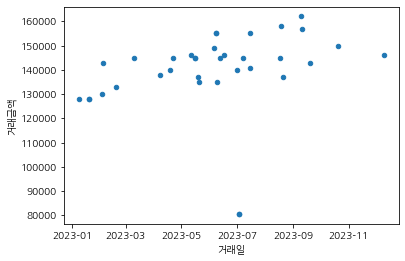

In [66]:
x_30_firstpark.plot('거래일','거래금액', kind='scatter')

In [67]:
df['년'] = df['거래일'].dt.year 
df['월'] = df['거래일'].dt.month 

In [69]:
df.groupby(['년', '월'], as_index=True).mean(['거래금액'])

건축년도          층       전용면적          일           거래금액  \
년    월                                                                 
2023 1        2012.0  11.212598  74.790120  17.622047    99285.03937   
     2    2011.22381  11.538095  73.213703  14.195238   99882.285714   
     3   2009.087912  10.043956  73.165381  15.851648   96246.978022   
     4   2008.588235  10.772549  75.454986       15.4   94642.717647   
     5   2009.054054  11.274775  72.504135  17.391892  100261.936937   
     6   2009.718367  10.795918  72.791691  14.212245  108669.171429   
     7   2008.694836  10.830986  73.854477  18.089202  104312.394366   
     8   2009.445887  12.051948  70.797710  15.709957  102046.277056   
     9   2006.107527  10.854839  72.211649  13.586022  101555.645161   
     10   2006.97541  10.606557  74.951604  15.393443  100180.327869   
     11  2008.420455  10.931818  71.696568  13.738636   92531.477273   
     12  2008.223301  11.087379  74.822540  16.456311  102946.223301   
2024 1   2009.181818   9.136364  68.535636   7.636364   88740.909091   

               평형대  
년    월              
2023 1   17.165354  
     2   15.714286  
     3   16.703297  
     4   17.176471  
     5   15.990991  
     6   15.918367  
     7   16.760563  
     8   15.714286  
     9   16.290323  
     10  17.049180  
     11  16.818182  
     12  17.184466  
2024 1   15.909091

# 여러개의 함수를 적용하여 GroupBy 집계
 - grouped.agg()

https://rfriend.tistory.com/392

# 연습문제(Exercise) 2 - Just Do It Now !

In [70]:
# 법정동, 년, 월 3개 값을 기준으로 groupby 하고, [거래량, 평균, 최고가, 최저가]를 뽑아보세요
# 1. df.groupby()
grouped = df.groupby(['법정동', '년', '월'])

# 2. 원하는 통계뽑기  HINT :  ['size' : 거래량, 'mean' : 평균, 'max' : 최대값, 'min' : 최소값]
function_list = ['size', 'mean', 'max', 'min']

# groupby_result.apply(pd.to_numeric)
# 3  grouped object.agg(function list)
groupby_result = grouped['거래금액'].agg(function_list)

# 4. 필요groupby_result시 데이터 타입으로 변경
groupby_result['mean'] = groupby_result['mean'].astype(int)

# 5. loc를 이용해서 특정동만 인덱싱하여 출력
groupby_result.loc['고덕동']

size    mean     max     min
년    월                               
2023 1     31  111432  197000   70000
     2     43  113362  200000   69000
     3     45  123348  160000   68000
     4     56  126166  215000   62000
     5     39  126234  187000   58000
     6     55  137923  240000  107000
     7     47  133744  177000   95000
     8     36  129519  185000   65000
     9     31  127741  172000   60000
     10    24  130318  185000   90000
     11    12  148145  224000  100000
     12    21  127461  175300   81500
2024 1      3  136166  155500  126000

In [71]:
# 20 평대 거래건수만 필터링 합니다.

In [72]:
x_20 = df.loc[df['평형대']==20]
x_20

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부,등기일자,거래일,평형대
1,11740,상암로,명일동,257,고덕주공9,1985,10,83.93,2023,1,...,10100,1,11740-1,중개거래,서울 강동구,None,None,23.03.31,2023-01-04,20.0
4,11740,양재대로,명일동,359,래미안솔베뉴,2019,12,84.63,2023,1,...,10100,1,11740-4585,중개거래,서울 강동구,None,None,23.03.28,2023-01-05,20.0
6,11740,상암로,명일동,257,고덕주공9,1985,7,83.52,2023,1,...,10100,1,11740-1,중개거래,서울 강동구,None,None,23.04.28,2023-01-09,20.0
7,11740,상암로,명일동,270,삼익가든,1984,9,66.87,2023,1,...,10100,1,11740-4,중개거래,서울 강동구,None,None,23.04.28,2023-01-09,20.0
8,11740,상암로51길,명일동,332,명일지에스아파트,1999,3,84.90,2023,1,...,10100,1,11740-3,중개거래,서울 강동구,23.02.13,O,None,2023-01-09,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,11740,천호대로,성내동,164-1,씨제이나인,2006,9,83.59,2024,1,...,10800,1,11740-2569,직거래,None,None,None,24.01.04,2024-01-02,20.0
2201,11740,올림픽로89길,천호동,568,강변그대가리버뷰,2007,9,84.93,2024,1,...,10900,1,11740-2628,중개거래,서울 강동구,None,None,None,2024-01-02,20.0
2203,11740,올림픽로89길,천호동,570,강변그대가갤럭시,2009,2,84.99,2024,1,...,10900,1,11740-2870,중개거래,서울 강동구,None,None,None,2024-01-11,20.0
2204,11740,천호대로,천호동,566,천호태영아파트,1999,7,84.88,2024,1,...,10900,1,11740-181,중개거래,서울 강동구,None,None,None,2024-01-13,20.0


In [73]:
x_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1091 entries, 1 to 2205
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지역코드        1091 non-null   object        
 1   도로명         1091 non-null   object        
 2   법정동         1091 non-null   object        
 3   지번          1091 non-null   object        
 4   아파트         1091 non-null   object        
 5   건축년도        1091 non-null   Int64         
 6   층           1091 non-null   Int64         
 7   전용면적        1091 non-null   float64       
 8   년           1091 non-null   int32         
 9   월           1091 non-null   int32         
 10  일           1091 non-null   Int64         
 11  거래금액        1091 non-null   Int64         
 12  도로명건물본번호코드  1091 non-null   object        
 13  도로명건물부번호코드  1091 non-null   object        
 14  도로명시군구코드    1091 non-null   object        
 15  도로명일련번호코드   1091 non-null   object        
 16  도로명지상지하코드   812 non-null    o

In [74]:
grouped = x_20.groupby(['법정동', '년', '월'])
function_list = ['size', 'mean', 'max', 'min']
groupby_result = grouped['거래금액'].agg(function_list) 

In [75]:
groupby_result

size           mean     max    min
법정동 년    월                                     
강일동 2023 1      1        74300.0   74300  74300
         2      5        75940.0   85000  59000
         3      3   87266.666667   93800  83000
         4      8        82525.0   86000  77500
         5      5        80800.0   88000  61000
...           ...            ...     ...    ...
천호동 2023 9      7  106642.857143  139000  60000
         10     8        98562.5  133000  65500
         11     4        77850.0   94000  58400
         12     5       101500.0  141000  74000
    2024 1      3   95566.666667   97500  94200

[115 rows x 4 columns]

In [76]:
# groupby_result.apply(pd.to_numeric)
groupby_result['mean'] = groupby_result['mean'].astype(int)
groupby_result.loc['고덕동']

size    mean     max     min
년    월                               
2023 1     15  122213  145000   86000
     2     17  128841  160000   87000
     3     25  134632  155000   84000
     4     30  135746  190000   62000
     5     18  143233  165000   94000
     6     31  149151  170000  130000
     7     25  144372  170000   95000
     8     17  140305  167000   91000
     9     15  138933  172000   60000
     10    11  145113  168000   90000
     11     4  156687  172000  145500
     12     8  133562  160000   81500
2024 1      1  155500  155500  155500

In [77]:
grouped_1 = x_20.groupby(['법정동', '거래일'])
function_list = ['size', 'mean', 'max', 'min']
groupby_result_1 = grouped_1['거래금액'].agg(function_list)

groupby_result_1['mean'] = groupby_result_1['mean'].astype(int)
dong = groupby_result_1.loc['고덕동']
dong

,size,mean,max,min
거래일,,,,
2023-01-05,1,108000,108000,108000
2023-01-09,1,127000,127000,127000
2023-01-12,1,86000,86000,86000
2023-01-16,1,113000,113000,113000
2023-01-19,1,119000,119000,119000
...,...,...,...,...
2023-12-12,1,137000,137000,137000
2023-12-16,1,157000,157000,157000
2023-12-23,2,120250,159000,81500


In [78]:
year_summary = df.groupby(['년'])['거래금액'].agg(['sum','mean', 'count'])
year_summary

,sum,mean,count
년,,,
2023,219766231,100625.563645,2184
2024,1952300,88740.909091,22


<Axes: xlabel='법정동'>

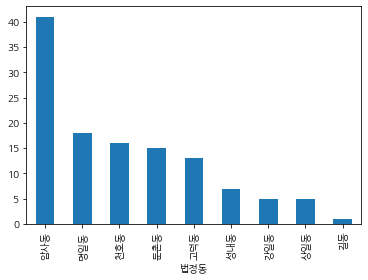

In [79]:
x_30.value_counts('법정동').plot(kind='bar')

<Axes: xlabel='평형대'>

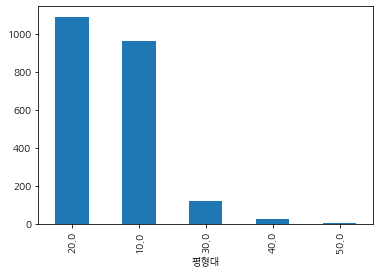

In [80]:
df.value_counts('평형대').plot(kind='bar')

# 5일, 10일, 30일 이동평균선 구하기

In [81]:
import warnings
warnings.filterwarnings("ignore")

# dong['MA3'] = dong['mean'].rolling(3).mean()
dong['MA5'] = dong['mean'].rolling(5).mean()
dong['MA10'] = dong['mean'].rolling(10).mean()
dong['MA30'] = dong['mean'].rolling(30).mean()
dong

,size,mean,max,min,MA5,MA10,MA30
거래일,,,,,,,
2023-01-05,1,108000,108000,108000,NaN,NaN,NaN
2023-01-09,1,127000,127000,127000,NaN,NaN,NaN
2023-01-12,1,86000,86000,86000,NaN,NaN,NaN
2023-01-16,1,113000,113000,113000,NaN,NaN,NaN
2023-01-19,1,119000,119000,119000,110600.0,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-12,1,137000,137000,137000,140250.0,148675.0,144058.333333
2023-12-16,1,157000,157000,157000,139200.0,149875.0,144258.333333
2023-12-23,2,120250,159000,81500,133850.0,145100.0,143666.666667


# 본인이 살고있는 지역구, 해당동 거래금액 및 거래량 그래프 시각화

In [82]:
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [83]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# !pip install --upgrade mplfinance

In [84]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

[그래프 구역 나누기 참고 블로그](https://yeko90.tistory.com/entry/matplotlib-%EA%B8%B0%EC%B4%88-subplot2grid%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%BB%A4%EC%8A%A4%ED%84%B0%EB%A7%88%EC%9D%B4%EC%A7%95)

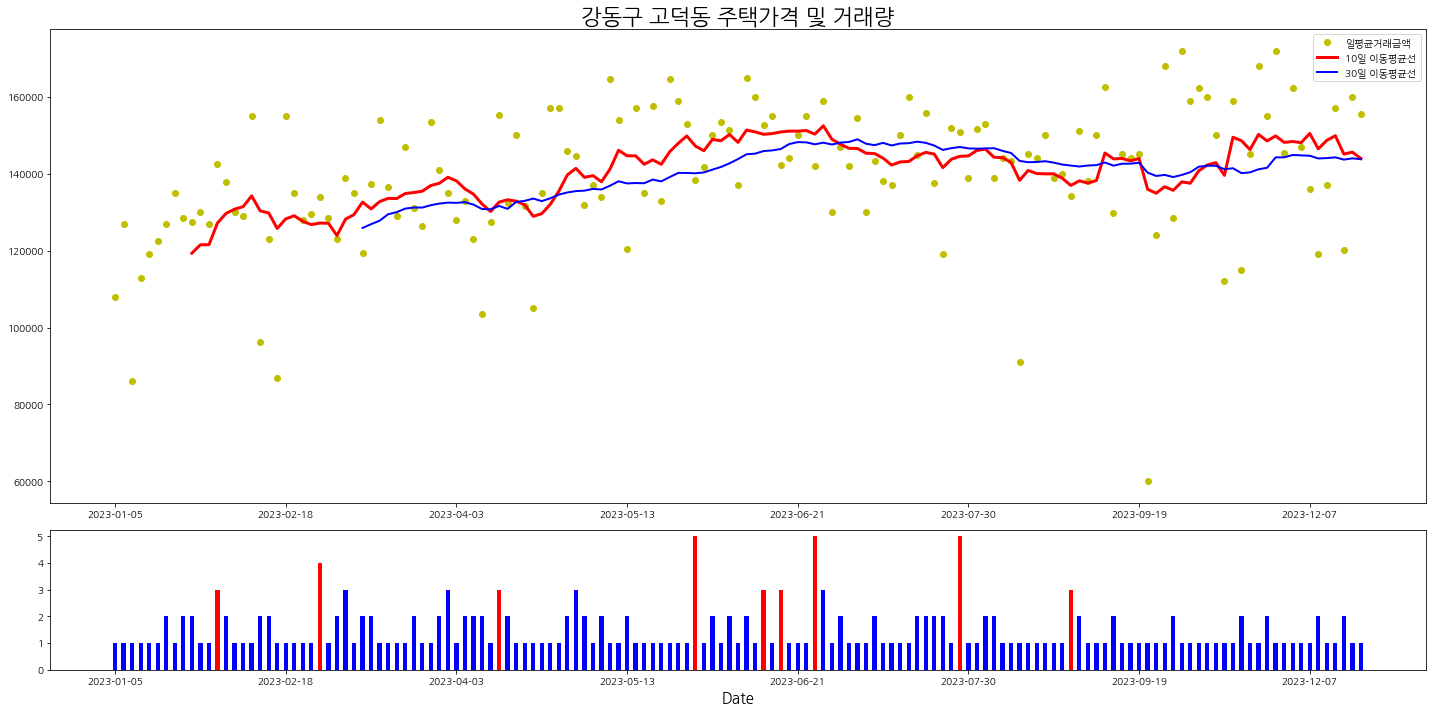

In [85]:
#----------------------------------------------------------------------------------#
# 그래프 구역 나누기 #참고 블로그 공부하시면 좋아요
fig = plt.figure(figsize=(20,10))
top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4) # 첫번째 인자값 (4,4)는 전체 shape, 두번째 인자값은 top axes의 위치 첫행(0), 첫열(0), 사이즈는 세로3x4가로
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4, sharex=top_axes) #두번째 인자값 3,0 에서 3은 네번째 행, 0은 첫번째열, 세로 1 x 가로 4
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
#----------------------------------------------------------------------------------#

# 인덱스 설정
idx = dong.index.astype('str')

# 일 평균 거래금액
top_axes.plot(idx, dong['mean'], 'yo', label='일평균거래금액', linewidth=0.7)

# 거래금액 이동평균선 그리기
top_axes.plot(idx, dong['MA10'],'r-', label='10일 이동평균선', linewidth=3.0)
top_axes.plot(idx, dong['MA30'],'b-', label='30일 이동평균선', linewidth=2.0)

# 캔들차트 그리기

#----------------------------------------------------------------------------------#

# 거래량 날짜 지정. 평균 거래량(건수) 보다 큰 날은 빨강, 작은 날은 파랑
color_fuc = lambda x : 'r' if x >dong['size'].mean() else 'b'
# color_fuc = lambda x : 'r' if x >= 0 else 'b'
color_list = list(dong['size'].diff().fillna(0).apply(color_fuc))

bottom_axes.bar(idx, dong['size'], width=0.5, 
                align='center',
                color=color_list)
#----------------------------------------------------------------------------------#

# 그래프 title 지정
top_axes.set_title('강동구 고덕동 주택가격 및 거래량', fontsize=22)

# X축 티커 숫자 10개로 제한 (22개월->22개)
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))

# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=15)

top_axes.legend()
plt.tight_layout()
plt.show()

### 정리 잘 되어있는 블로그, 깃허브 추천
 - [실거래가 데이터 핸들링 기초](https://baem1n.dev/2021/01/31/DATA-APT-05/#%EA%B5%AC%EB%B3%84-%ED%95%A9%EA%B3%84-%EA%B1%B0%EB%9E%98-%EA%B8%88%EC%95%A1-%EA%B3%84%EC%82%B0)
 - [파이썬으로 배우는 알고리즘 트레이딩](https://wikidocs.net/4765)
 - [청년 데이터 프로젝트](https://github.com/ek-koh/zipdoc_project/blob/master/pre_processing/%EC%9D%B8%EA%B5%AC%EC%A3%BC%ED%83%9D%EC%B4%9D%EC%A1%B0%EC%82%AC_%EA%B0%80%EA%B5%AC%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb)
 - [플롯 틱수 설정방법](https://www.delftstack.com/ko/howto/matplotlib/set-number-of-plot-ticks/)